In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [251]:
train_data = pd.read_csv("open/train.csv")
test_data = pd.read_csv("open/test.csv")
sample_submission = pd.read_csv("open/sample_submission.csv")

In [208]:
train_data.columns

Index(['ID', 'Age', 'Gender', 'Education_Status', 'Employment_Status',
       'Working_Week (Yearly)', 'Industry_Status', 'Occupation_Status', 'Race',
       'Hispanic_Origin', 'Martial_Status', 'Household_Status',
       'Household_Summary', 'Citizenship', 'Birth_Country',
       'Birth_Country (Father)', 'Birth_Country (Mother)', 'Tax_Status',
       'Gains', 'Losses', 'Dividends', 'Income_Status', 'Income'],
      dtype='object')

각 데이터 분포도를 시각화
gains, losses, dividends 가 train과 test 데이터에서 다른 분포도를 보임. 

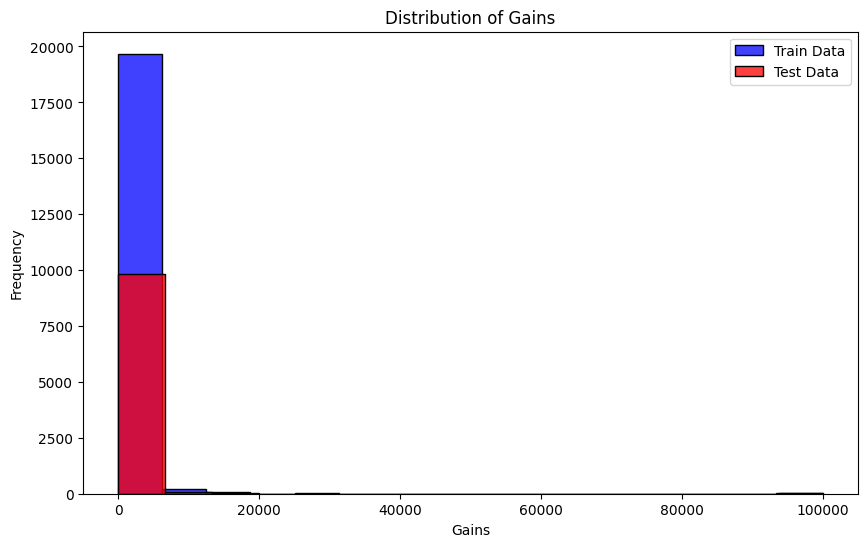

In [145]:
def visualize_distribution(train_data, test_data, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(train_data[column], color='blue',  label='Train Data')
    sns.histplot(test_data[column], color='red',  label='Test Data')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


visualize_distribution(train_data, test_data, 'Gains')

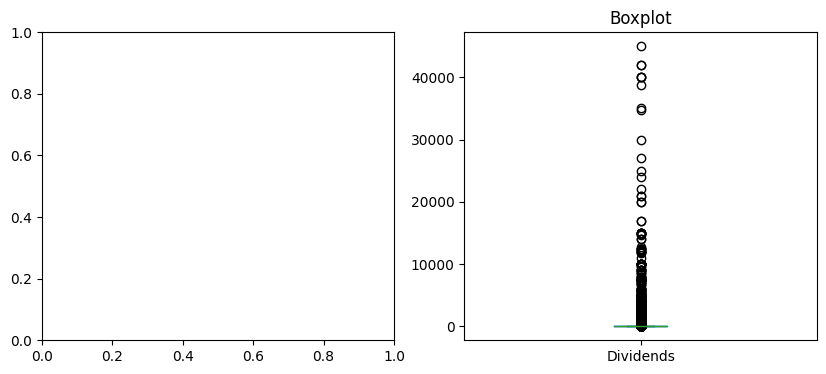

In [60]:
fig, axes = plt.subplots(1,2, figsize=(10, 4))
train_data['Dividends'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')

plt.show()

In [54]:
train_data.Dividends.describe()

count    20000.000000
mean       123.451450
std       1206.949429
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      45000.000000
Name: Dividends, dtype: float64

In [14]:
train_data['Gender'].value_counts()

test_data['Gender'].value_counts()

Gender
F    10472
M     9528
Name: count, dtype: int64

In [11]:
train_data['Education_Status'].value_counts()

Education_Status
High graduate                     6494
College                           3794
Children                          2208
Bachelors degree                  1956
High Junior                        820
High Sophomore                     799
Associates degree (Vocational)     741
Associates degree (Academic)       609
High Freshman                      555
Middle (7-8)                       548
Masters degree                     505
Elementary (5-6)                   317
High Senior                        242
Elementary (1-4)                   150
Professional degree                111
Doctorate degree                    87
Kindergarten                        64
Name: count, dtype: int64

In [146]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      20000 non-null  object
 1   Age                     20000 non-null  int64 
 2   Gender                  20000 non-null  object
 3   Education_Status        20000 non-null  object
 4   Employment_Status       20000 non-null  object
 5   Working_Week (Yearly)   20000 non-null  int64 
 6   Industry_Status         20000 non-null  object
 7   Occupation_Status       20000 non-null  object
 8   Race                    20000 non-null  object
 9   Hispanic_Origin         20000 non-null  object
 10  Martial_Status          20000 non-null  object
 11  Household_Status        20000 non-null  object
 12  Household_Summary       20000 non-null  object
 13  Citizenship             20000 non-null  object
 14  Birth_Country           20000 non-null  object
 15  Bi

In [23]:
train_data['Income_Status'].value_counts()

Under Median    13237
Unknown          6026
Over Median       737
Name: Income_Status, dtype: int64

In [ ]:
train_data['Hispanic_Origin'].value_counts()

In [11]:
test_data

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Household_Summary,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status
0,TEST_0000,79,M,High Junior,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,...,Householder,Native,US,Unknown,Unknown,Single,0,0,0,Under Median
1,TEST_0001,47,M,Elementary (5-6),Children or Armed Forces,0,Not in universe or children,Unknown,White,Other Spanish,...,Child 18 or older,Native,US,US,US,Nonfiler,0,0,0,Under Median
2,TEST_0002,18,F,High Junior,Children or Armed Forces,52,Retail,Services,White,All other,...,Child 18 or older,Native,US,US,US,Single,0,0,0,Under Median
3,TEST_0003,39,F,Associates degree (Vocational),Full-Time,30,Medical (except Hospitals),Services,White,All other,...,Spouse of householder,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Unknown
4,TEST_0004,6,M,Children,Children or Armed Forces,0,Not in universe or children,Unknown,White,Mexican-American,...,Child under 18 never married,Native,US,US,US,Nonfiler,0,0,0,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,TEST_9995,31,M,Bachelors degree,Children or Armed Forces,52,Other professional services,Technicians & Support,White,All other,...,Householder,Native,US,US,US,Single,0,0,0,Under Median
9996,TEST_9996,27,M,College,Children or Armed Forces,52,Retail,Handlers/Cleaners,White,All other,...,Householder,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Under Median
9997,TEST_9997,18,M,High graduate,Children or Armed Forces,7,Retail,Services,Black,All other,...,Child 18 or older,Native,US,US,US,Nonfiler,0,0,0,Under Median
9998,TEST_9998,9,M,Children,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,...,Child under 18 never married,Native,US,US,US,Nonfiler,0,0,0,Under Median


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      10000 non-null  object
 1   Age                     10000 non-null  int64 
 2   Gender                  10000 non-null  object
 3   Education_Status        10000 non-null  object
 4   Employment_Status       10000 non-null  object
 5   Working_Week (Yearly)   10000 non-null  int64 
 6   Industry_Status         10000 non-null  object
 7   Occupation_Status       10000 non-null  object
 8   Race                    10000 non-null  object
 9   Hispanic_Origin         10000 non-null  object
 10  Martial_Status          10000 non-null  object
 11  Household_Status        9999 non-null   object
 12  Household_Summary       10000 non-null  object
 13  Citizenship             10000 non-null  object
 14  Birth_Country           10000 non-null  object
 15  Bir

In [24]:
test_data['Income_Status'].value_counts()

Under Median    6642
Unknown         2954
Over Median      404
Name: Income_Status, dtype: int64

In [98]:
train_data['Occupation_Status'].value_counts()

Occupation_Status
Unknown                             4688
Admin Support (include Clerical)    2709
Services                            2313
Craft & Repair                      1869
Sales                               1692
Professional                        1488
Machine Operators & Inspectors      1383
Management                          1111
Handlers/Cleaners                    837
Transportation                       690
Technicians & Support                558
Farming & Forestry & Fishing         296
Protective Services                  260
Private Household Services           105
Armed Forces                           1
Name: count, dtype: int64

In [100]:
train_data[train_data['Occupation_Status'] == 'Unknown']['Income'].value_counts()

Income
0    4688
Name: count, dtype: int64

In [106]:
train_data['Industry_Status'].value_counts()

Industry_Status
Not in universe or children                     4688
Retail                                          3149
Manufacturing (Durable)                         1575
Manufacturing (Non-durable)                     1223
Education                                       1041
Business & Repair                                847
Medical (except Hospitals)                       838
Construction                                     832
Hospitals                                        821
Finance Insurance & Real Estate                  727
Transportation                                   693
Public Administration                            641
Other professional services                      477
Wholesale                                        450
Personal Services (except Private Household)     429
Social Services                                  367
Entertainment                                    278
Agriculture                                      268
Utilities & Sanitary          

In [107]:
train_data[train_data['Industry_Status'] == 'Not in universe or children ']['Income'].value_counts()

Series([], Name: count, dtype: int64)

In [102]:
train_data[train_data['Occupation_Status'] == 'Admin Support (include Clerical)']['Income'].value_counts()

Income
0       574
800     137
700     123
600     104
500      98
       ... 
808       1
640       1
741       1
1370      1
505       1
Name: count, Length: 461, dtype: int64

이상치 제거
제거하니 성능 더 떨어짐 

In [147]:
# 이상치 제거 방법
def remove_outliers_iqr(df, column_name):

    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    return df

In [148]:
# train_data = remove_outliers_iqr(train_data, 'Gains')
# train_data = remove_outliers_iqr(train_data, 'Losses')
# train_data = remove_outliers_iqr(train_data, 'Dividends')
# train_data = remove_outliers_iqr(train_data, 'Income')

In [129]:
train_data

,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,Martial_Status,Household_Status,Household_Summary,Citizenship,Tax_Status,Gains,Losses,Dividends,Income_Status,Income
0,63,M,Middle (7-8),Full-Time,4,Social Services,Services,White,All other,Married,Householder,Householder,Native,Nonfiler,0,0,0,Unknown,425
1,37,M,Associates degree (Vocational),Full-Time,52,Entertainment,Services,White,All other,Separated,Nonfamily householder,Householder,Native,Single,0,0,0,Under Median,0
2,58,F,High graduate,Full-Time,52,Manufacturing (Non-durable),Admin Support (include Clerical),Black,All other,Married,Householder,Householder,Native,Married Filling Jointly both under 65 (MFJ),3411,0,0,Under Median,860
3,44,M,High graduate,Full-Time,52,Retail,Technicians & Support,White,All other,Divorced,Nonfamily householder,Householder,Native,Single,0,0,0,Under Median,850
4,37,F,High graduate,Full-Time,52,Retail,Sales,White,All other,Divorced,Householder,Householder,Native,Head of Household (HOH),0,0,0,Unknown,570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,33,M,High graduate,Children or Armed Forces,52,Manufacturing (Durable),Handlers/Cleaners,White,All other,Single,Nonfamily householder,Householder,Native,Single,0,0,0,Under Median,1300
19996,20,F,College,Full-Time,12,Education,Admin Support (include Clerical),White,Mexican-American,Single,Child 18+ never marr Not in a subfamily,Child 18 or older,Native,Nonfiler,0,0,0,Under Median,850
19997,22,M,College,Children or Armed Forces,52,Transportation,Technicians & Support,White,All other,Single,In group quarters,Group Quarters- Secondary individual,Native,Single,0,0,0,Unknown,999
19998,76,F,High graduate,Not Working,0,Not in universe or children,Unknown,White,All other,Widowed,Nonfamily householder,Householder,Native,Single,0,0,0,Under Median,0


버릴 칼럼 설정

In [252]:
train_data = train_data.drop(['ID','Birth_Country (Father)','Birth_Country (Mother)','Birth_Country'] ,axis=1)

feature selection
p-value는 귀무가설(두 변수가 서로 독립적이다)에 대한 가설 검정 결과를 나타냅니다. 따라서 p-value가 유의수준(예: 0.05)보다 작으면 귀무가설을 기각하고, 두 변수 간에는 통계적으로 유의한 관계가 있음을 의미합니다.

In [253]:
from scipy.stats import chi2_contingency

# train_data의 모든 열을 사용하여 카이제곱 검정을 수행
chi2_results = {}

relation = []
no_relation =[]
# 각 열에 대한 카이제곱 검정 수행
for column in train_data.columns:
    contingency_table = pd.crosstab(train_data['Income'], train_data[column])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_results[column] = {'Chi-square Statistic': chi2, 'p-value': p_value}

# 결과 출력
for column, result in chi2_results.items():
    # print(f"Column: {column}")
    # print(f"Chi-square Statistic: {result['Chi-square Statistic']}")
    # print(f"p-value: {result['p-value']}")
    # 유의수준 0.05로 설정
    if result['p-value'] < 0.05:
        relation.append(column)
    else:
        no_relation.append(column)
print('income과 연관적인 데이터 :',relation)
print('income과 독립적인 데이터 :',no_relation)

income과 연관적인 데이터 : ['Gender', 'Education_Status', 'Employment_Status', 'Working_Week (Yearly)', 'Industry_Status', 'Occupation_Status', 'Martial_Status', 'Household_Summary', 'Tax_Status', 'Gains', 'Losses', 'Dividends', 'Income_Status', 'Income']
income과 독립적인 데이터 : ['Age', 'Race', 'Hispanic_Origin', 'Household_Status', 'Citizenship']


In [254]:
from scipy.special import boxcox1p

lambda_value = 0
train_data['Working_Week (Yearly)'] = boxcox1p(train_data['Working_Week (Yearly)'],lambda_value)

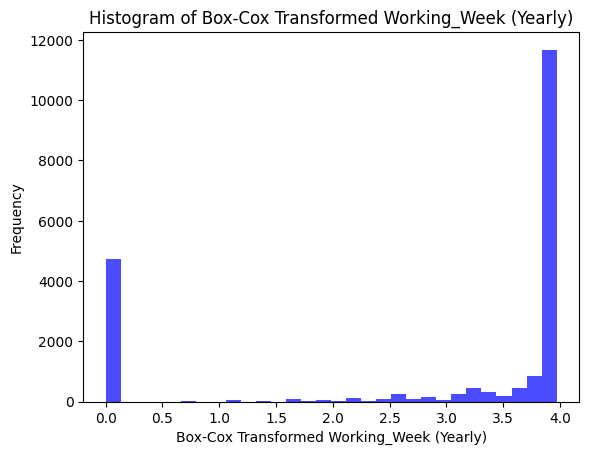

In [255]:
plt.hist(train_data['Working_Week (Yearly)'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Box-Cox Transformed Working_Week (Yearly)')
plt.xlabel('Box-Cox Transformed Working_Week (Yearly)')
plt.ylabel('Frequency')
plt.show()

In [256]:
lambda_value = 0
train_data['Gains'] = boxcox1p(train_data['Gains'],lambda_value)

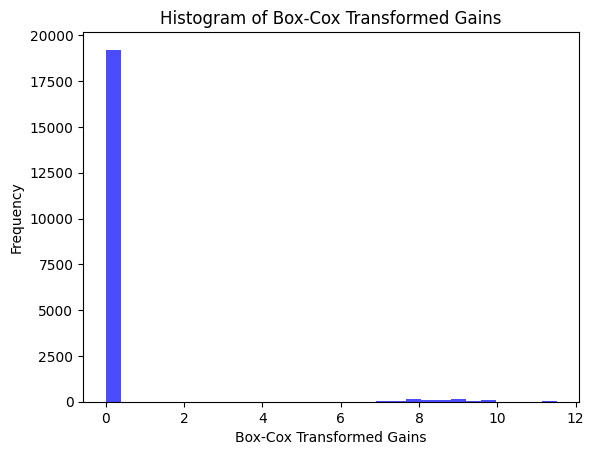

In [257]:
plt.hist(train_data['Gains'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Box-Cox Transformed Gains')
plt.xlabel('Box-Cox Transformed Gains')
plt.ylabel('Frequency')
plt.show()

In [258]:
lambda_value = 0
train_data['Losses'] = boxcox1p(train_data['Losses'],lambda_value)

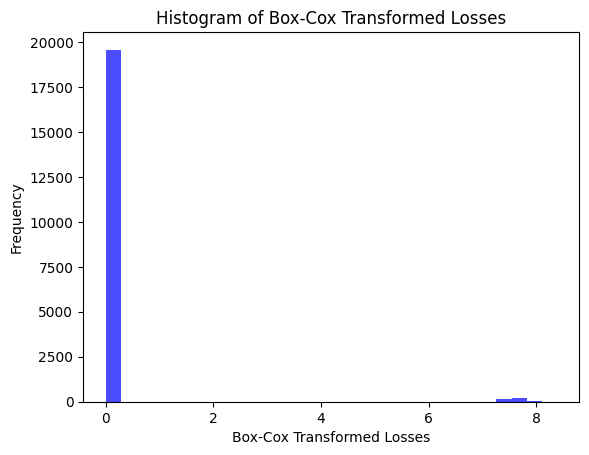

In [259]:
plt.hist(train_data['Losses'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Box-Cox Transformed Losses')
plt.xlabel('Box-Cox Transformed Losses')
plt.ylabel('Frequency')
plt.show()

Modeling

In [260]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(train_data.drop('Income', axis=1), train_data['Income'], test_size=0.2, random_state=42)

cat_features = [i for i, col in enumerate(train_data.columns) if train_data[col].dtype == 'object']

model = CatBoostRegressor(iterations=500,  # 반복 횟수
                          depth=6,        # 트리의 최대 깊이
                          learning_rate=0.1,  # 학습률
                          cat_features=cat_features,
                          random_seed=42)

# 모델 훈련
model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50, verbose=100)

# 테스트 세트에 대한 예측
y_pred = model.predict(X_test)

# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

0:	learn: 689.1609900	test: 689.0120559	best: 689.0120559 (0)	total: 6.55ms	remaining: 3.27s
100:	learn: 583.2521686	test: 590.8626818	best: 590.7414692 (98)	total: 621ms	remaining: 2.45s
200:	learn: 574.9414251	test: 588.0023878	best: 588.0023878 (200)	total: 1.28s	remaining: 1.91s
300:	learn: 566.3033096	test: 587.0973421	best: 586.9538132 (282)	total: 2.02s	remaining: 1.33s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 586.7026199
bestIteration = 325

Shrink model to first 326 iterations.
Root Mean Squared Error (RMSE): 586.7026198653331


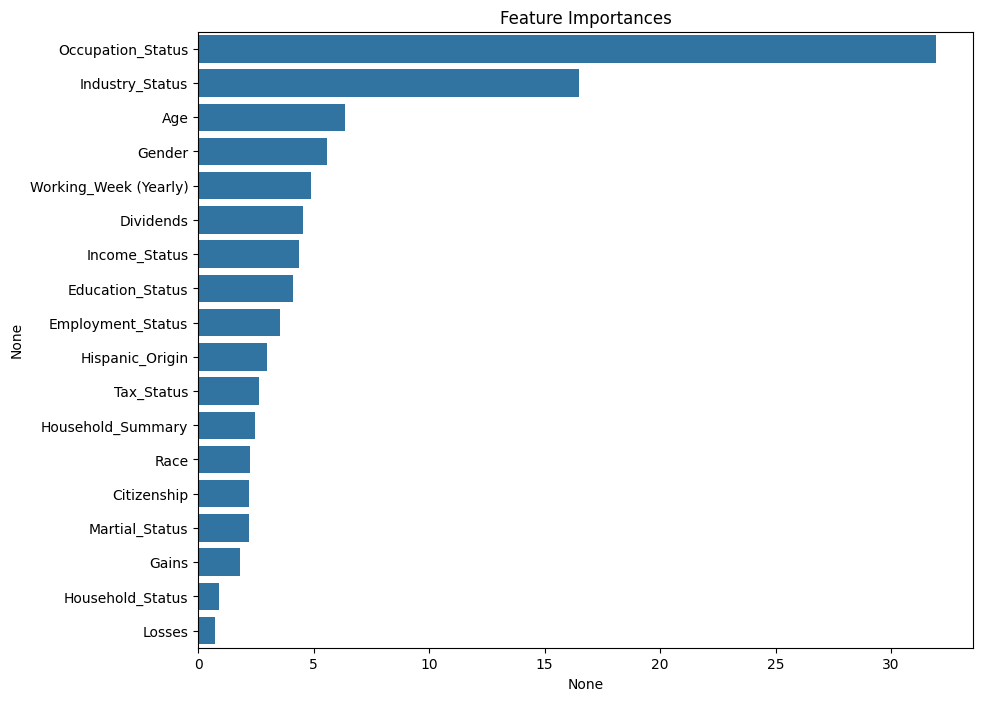

In [261]:
# 위 feature importance를 시각화해봅니다.
importances = pd.Series(model.feature_importances_, index=list(X_train.columns))
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10,8))
plt.title("Feature Importances")
sns.barplot(x=importances, y=importances.index)
plt.show()

In [242]:
test_data

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Household_Summary,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status
0,TEST_0000,79,M,High Junior,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,...,Householder,Native,US,Unknown,Unknown,Single,0,0,0,Under Median
1,TEST_0001,47,M,Elementary (5-6),Children or Armed Forces,0,Not in universe or children,Unknown,White,Other Spanish,...,Child 18 or older,Native,US,US,US,Nonfiler,0,0,0,Under Median
2,TEST_0002,18,F,High Junior,Children or Armed Forces,52,Retail,Services,White,All other,...,Child 18 or older,Native,US,US,US,Single,0,0,0,Under Median
3,TEST_0003,39,F,Associates degree (Vocational),Full-Time,30,Medical (except Hospitals),Services,White,All other,...,Spouse of householder,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Unknown
4,TEST_0004,6,M,Children,Children or Armed Forces,0,Not in universe or children,Unknown,White,Mexican-American,...,Child under 18 never married,Native,US,US,US,Nonfiler,0,0,0,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,TEST_9995,31,M,Bachelors degree,Children or Armed Forces,52,Other professional services,Technicians & Support,White,All other,...,Householder,Native,US,US,US,Single,0,0,0,Under Median
9996,TEST_9996,27,M,College,Children or Armed Forces,52,Retail,Handlers/Cleaners,White,All other,...,Householder,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Under Median
9997,TEST_9997,18,M,High graduate,Children or Armed Forces,7,Retail,Services,Black,All other,...,Child 18 or older,Native,US,US,US,Nonfiler,0,0,0,Under Median
9998,TEST_9998,9,M,Children,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,...,Child under 18 never married,Native,US,US,US,Nonfiler,0,0,0,Under Median


In [262]:
rows_with_null = test_data[test_data.isnull().any(axis=1)]
print(rows_with_null)

             ID  Age Gender Education_Status         Employment_Status  \
2659  TEST_2659   20      F          College  Children or Armed Forces   

      Working_Week (Yearly)              Industry_Status Occupation_Status  \
2659                      0  Not in universe or children           Unknown   

       Race Hispanic_Origin  ...              Household_Summary Citizenship  \
2659  Black       All other  ...  Other relative of householder      Native   

     Birth_Country Birth_Country (Father) Birth_Country (Mother) Tax_Status  \
2659            US                     US                     US   Nonfiler   

     Gains Losses  Dividends  Income_Status  
2659     0      0          0   Under Median  

[1 rows x 22 columns]


In [263]:
test_data.Household_Status.value_counts()

Household_Status
Householder                                                               3128
Spouse of householder                                                     2418
Child <18 never marr not in subfamily                                     1290
Nonfamily householder                                                     1191
Child 18+ never marr Not in a subfamily                                    910
Secondary individual                                                       415
Other Rel 18+ never marr not in subfamily                                  110
Other Rel 18+ ever marr not in subfamily                                    78
Child 18+ ever marr Not in a subfamily                                      63
Child 18+ ever married Responsible Person of subfamily                      57
Responsible Person of unrelated subfamily                                   38
Grandchild <18 never marr not in subfamily                                  37
Other Relative 18+ spouse of subfam

In [264]:
test_data['Household_Status'].fillna('Child 18+ never marr Not in a subfamily', inplace=True)

In [265]:
test_data = test_data.drop(['ID','Birth_Country (Father)','Birth_Country (Mother)','Birth_Country'] ,axis=1)

In [266]:
lambda_value = 0
test_data['Working_Week (Yearly)'] = boxcox1p(test_data['Working_Week (Yearly)'],lambda_value)
test_data['Gains'] = boxcox1p(test_data['Gains'],lambda_value)
test_data['Losses'] = boxcox1p(test_data['Losses'],lambda_value)

In [267]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    10000 non-null  int64  
 1   Gender                 10000 non-null  object 
 2   Education_Status       10000 non-null  object 
 3   Employment_Status      10000 non-null  object 
 4   Working_Week (Yearly)  10000 non-null  float64
 5   Industry_Status        10000 non-null  object 
 6   Occupation_Status      10000 non-null  object 
 7   Race                   10000 non-null  object 
 8   Hispanic_Origin        10000 non-null  object 
 9   Martial_Status         10000 non-null  object 
 10  Household_Status       10000 non-null  object 
 11  Household_Summary      10000 non-null  object 
 12  Citizenship            10000 non-null  object 
 13  Tax_Status             10000 non-null  object 
 14  Gains                  10000 non-null  float64
 15  Los

In [268]:
test_predictions = model.predict(test_data)
print(test_predictions)

[  0.97852041 -17.07283678 399.48209105 ... 379.3644897    1.65222022
 559.35778206]


In [269]:
sample_submission['Income'] = test_predictions

# Save the updated DataFrame to a new CSV file
sample_submission.to_csv('predicted_sample_submission_catboost_train_size_0.8_drop_family_box_cox_lambda_0.csv', index=False)

# Display the first few rows of the updated DataFrame
print(sample_submission.head())

          ID      Income
0  TEST_0000    0.978520
1  TEST_0001  -17.072837
2  TEST_0002  399.482091
3  TEST_0003  676.348459
4  TEST_0004   -5.002915
